In [3]:
!conda install  -y -c conda-forge altair vega_datasets notebook vega

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.7
  latest version: 4.6.14

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Applications/anaconda3

  added / updated specs:
    - altair
    - notebook
    - vega
    - vega_datasets


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-3.0.1               |           py36_0         728 KB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    certifi-2019.3.9           |           py36_0         149 KB  conda-forge
    conda-4.6.14               |           py36_0         2.1 MB  conda-forge
    notebook-5.7.8             |           py36_1         6.0 MB  conda-forge
    openssl-1.1.1b             |       h01d97ff_2         3.5 MB  conda-forge
    vega-2.1.0          

In [4]:
import pandas as pd

In [7]:
df = pd.read_csv("brain.csv")

In [9]:
df.head()

,Index,Brain Weight,Body Weight
0,1,3.385,44.5
1,2,0.480,15.5
2,3,1.350,8.1
3,4,465.000,423.0
4,5,36.330,119.5


In [ ]:
# Importamos altair para poder hacer graficas

In [10]:
import altair as alt

In [11]:
alt.renderers.enable("notebook")

RendererRegistry.enable('notebook')

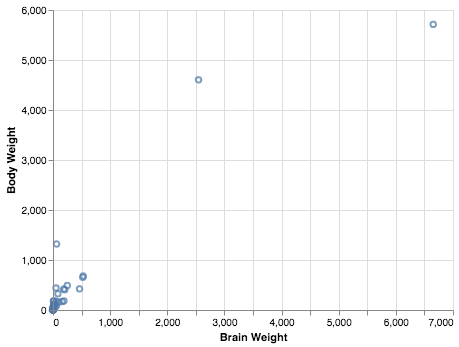

In [12]:
alt.Chart(df).mark_point().encode(
x="Brain Weight",
y="Body Weight"
)

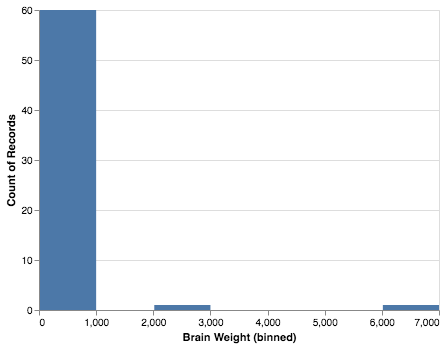

In [14]:
alt.Chart(df).mark_bar().encode(
x=alt.X("Brain Weight", bin=True),
y="count()"
)

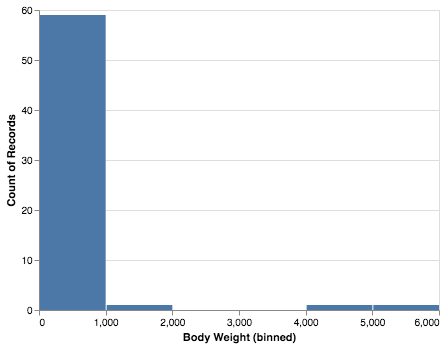

In [15]:
alt.Chart(df).mark_bar().encode(
x=alt.X("Body Weight", bin=True),
y="count()"
)

In [ ]:
# guardamos cada uno de los charts dentro de una variable

In [28]:
scatter= alt.Chart(df).mark_point().encode(
x="Brain Weight",
y="Body Weight",
tooltip="Brain Weight"
).properties(
width=700
).interactive()

In [29]:
hist_brain= alt.Chart(df).mark_bar().encode(
x=alt.X("Brain Weight", bin=True),
y="count()").properties(
width=300
)


In [30]:
hist_body=alt.Chart(df).mark_bar().encode(
x=alt.X("Body Weight", bin=True),
y="count()").properties(
width=300
)

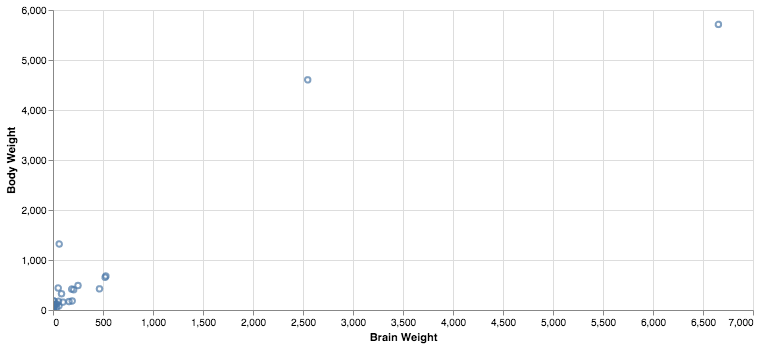

In [31]:
scatter #si llamo cada uno me los enseña por separado

In [32]:
# ahora hay que concatenar orizontalmente o verticarlmente los graficos

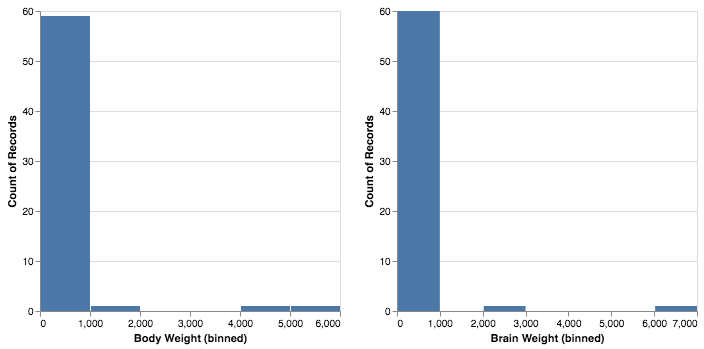

In [33]:
hist_body|hist_brain 

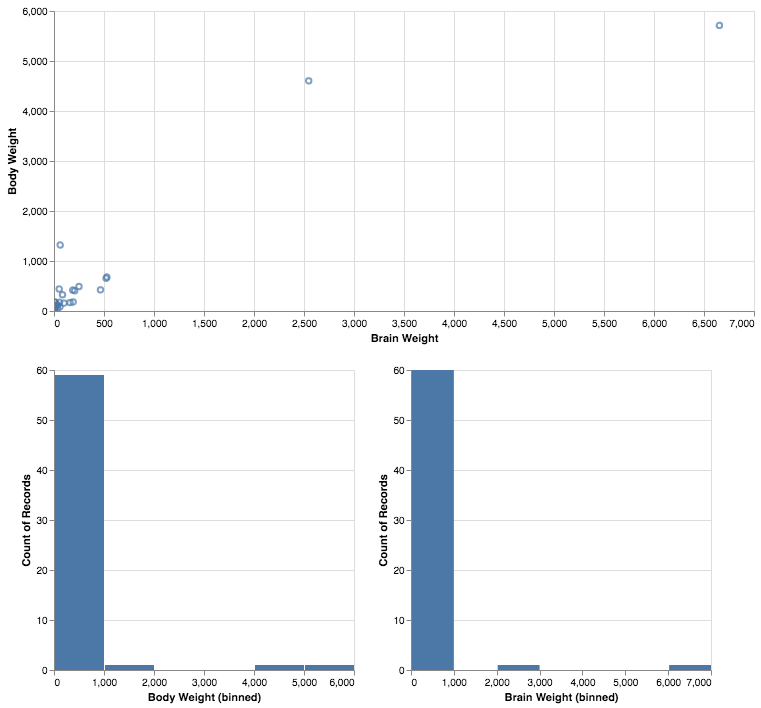

In [34]:
scatter&(hist_body|hist_brain)

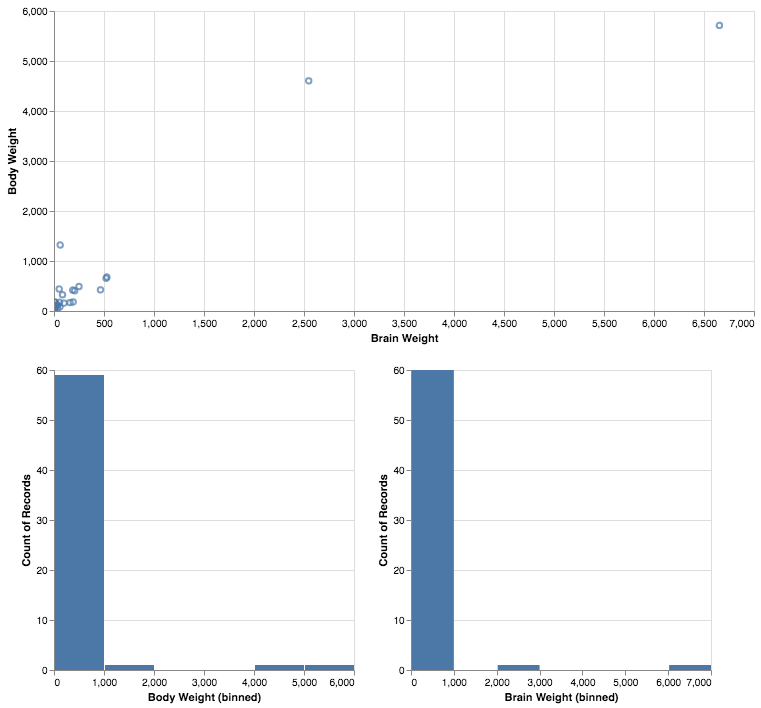

In [35]:
# añadimos el .interactive para hacer el zoom, y el width para la anchura del eje y el tooltip para saber el valor
# que tiene el punto pasandole el ratón por encima

scatter= alt.Chart(df).mark_point().encode(
x="Brain Weight",
y="Body Weight",
tooltip="Brain Weight"
).properties(
width=700
).interactive()

hist_brain= alt.Chart(df).mark_bar().encode(
x=alt.X("Brain Weight", bin=True),
y="count()").properties(
width=300
)

hist_body=alt.Chart(df).mark_bar().encode(
x=alt.X("Body Weight", bin=True),
y="count()").properties(
width=300
)

scatter&(hist_body|hist_brain)

### Searches Trend

In [36]:
searches = pd.read_csv("google_trends(1).csv")

In [37]:
searches.head()

,date,search_term,value
0,2004-01,SPSS data,6
1,2004-02,SPSS data,8
2,2004-03,SPSS data,7
3,2004-04,SPSS data,7
4,2004-05,SPSS data,6


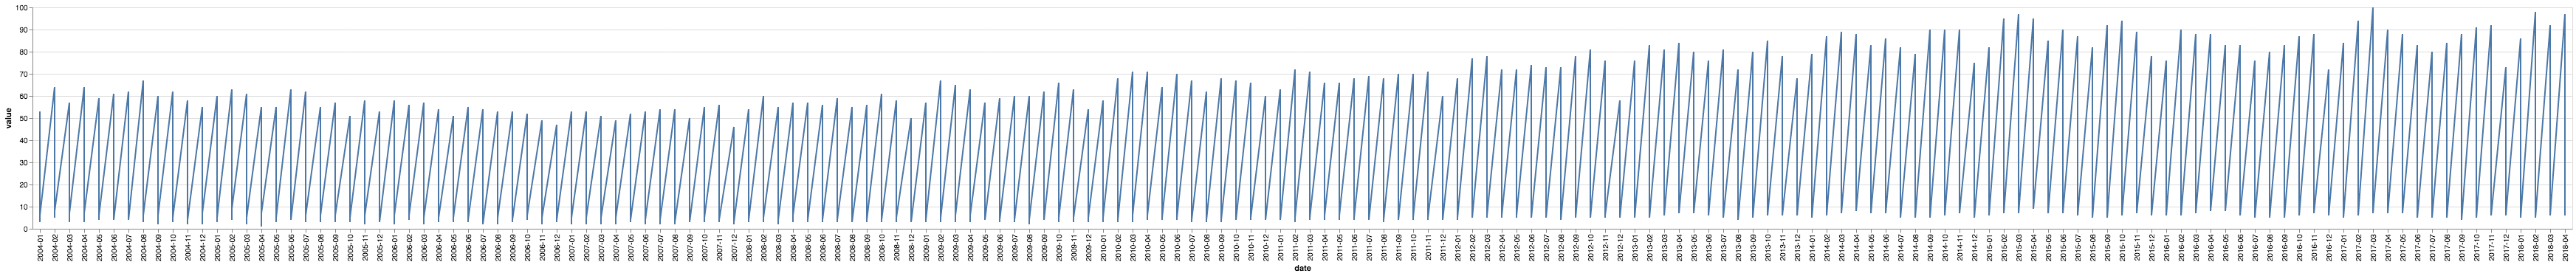

In [39]:
alt.Chart(searches).mark_line().encode(
    x="date",
    y="value"
)
# ahora la fecha me la considera como una categoría => hay que decirle que es temporal

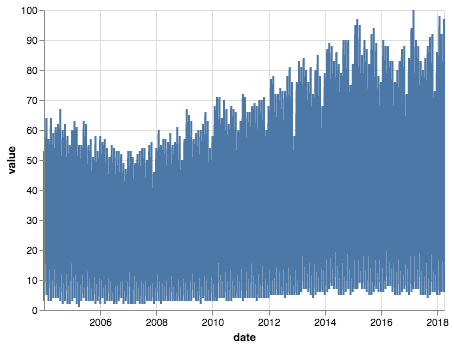

In [40]:
alt.Chart(searches).mark_line().encode(
    x="date:T",
    y="value"
)
# ahora en el valor indicamos que queremos la media

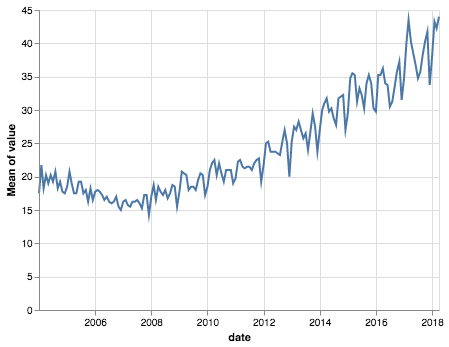

In [41]:
alt.Chart(searches).mark_line().encode(
    x="date:T",
    y="mean(value)"
)
# ahora añadimos el search_term que se muestre como lineas coloreadas

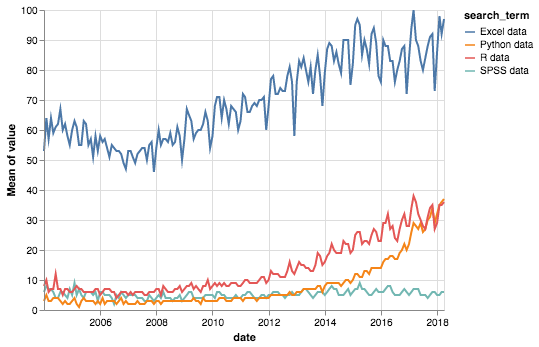

In [42]:
alt.Chart(searches).mark_line().encode(
    x="date:T",
    y="mean(value)",
    color="search_term"
)

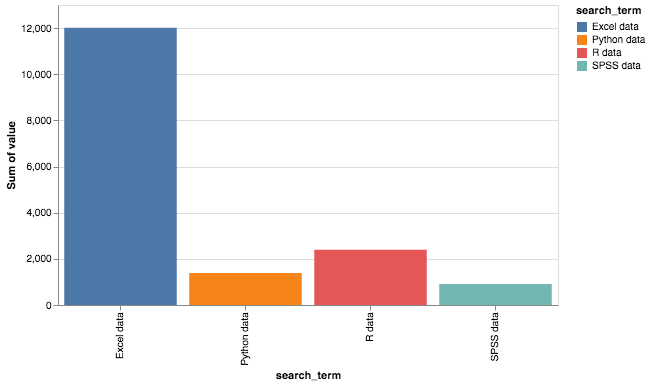

In [48]:
alt.Chart(searches).mark_bar().encode(
    x="search_term",
    y="sum(value)",
    color="search_term").properties(
    width=500
)

# para hacer uno para cada año

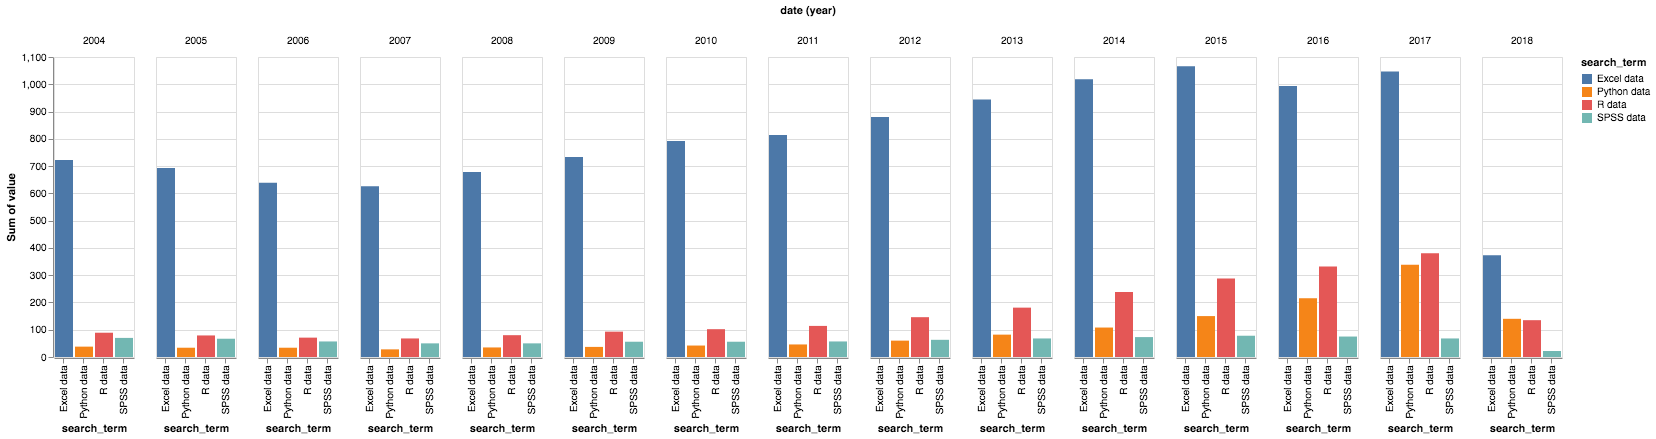

In [53]:
alt.Chart(searches).mark_bar().encode(
    x="search_term",
    y="sum(value)",
    color="search_term",
    column="year(date)"
)

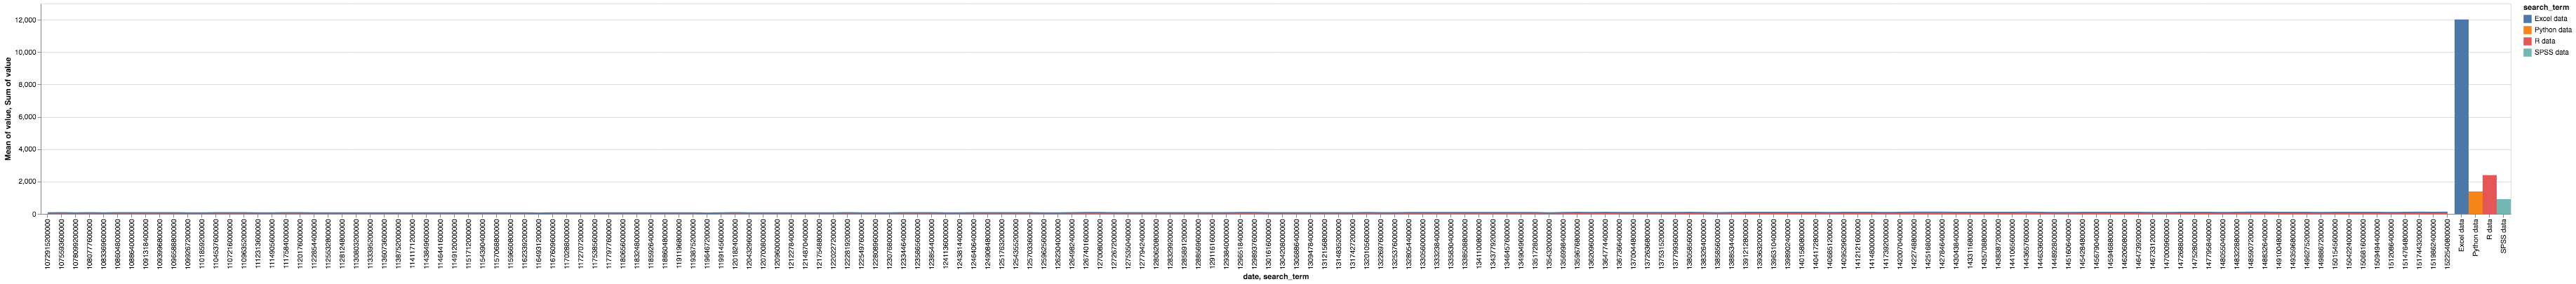

In [56]:
# ahora hacemos uno de barras para searches y luego que lo muestre por años

alt.Chart(searches).mark_line().encode(
    x="date:T",
    y="mean(value)",
    color="search_term"
)+alt.Chart(searches).mark_bar().encode(
    x="search_term",
    y="sum(value)",
    color="search_term"
)

# INCOMPLETO



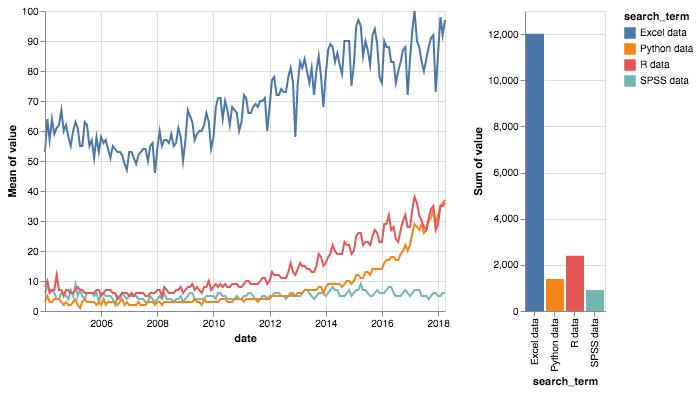

In [57]:
# Ahora juntamos los dos tipos de graficos

line = alt.Chart(searches).mark_line().encode(
    x="date:T",
    y="mean(value)",
    color="search_term"
)

bar = alt.Chart(searches).mark_bar().encode(
    x="search_term",
    y="sum(value)",
    color="search_term"
)
line|bar

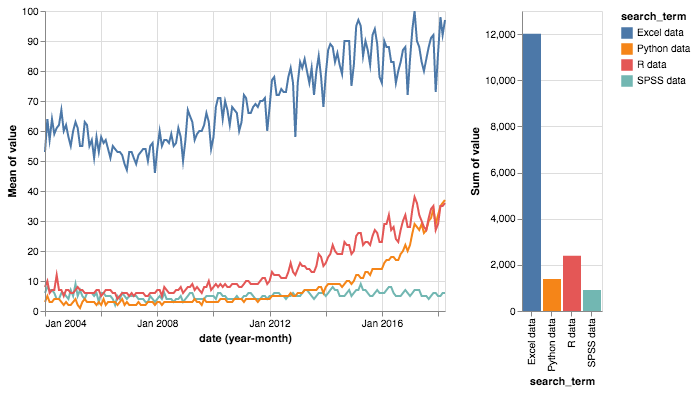

In [62]:
# interacciones => algo hecho en un grafico que afectara al otro

select_time = alt.selection_interval(encodings=["x"])

line = alt.Chart(searches).mark_line().encode(
    x="yearmonth(date):T", #añadimos el yearmonth
    y="mean(value)",
    color="search_term"
).properties(selection=select_time)

bar = alt.Chart(searches).mark_bar().encode(
    x="search_term",
    y="sum(value)",
    color="search_term"
).transform_filter(
select_time #añadimos el transform filter para selection intercativa
)

line|bar

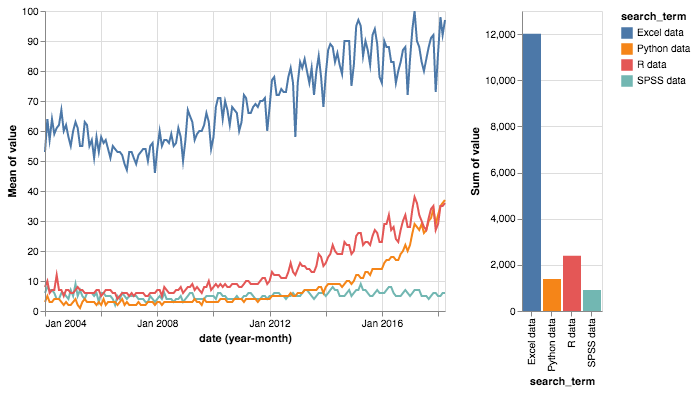

In [63]:
# ahora lo hacemos pero al reves, para el grafico de barras

select_term = alt.selection_single(encodings=["x"]) #se selecciona single porque se selecciona un punto (barra)

line = alt.Chart(searches).mark_line().encode(
    x="yearmonth(date):T", 
    y="mean(value)",
    color="search_term"
).transform_filter(
select_time
) #ahora intertimos el transform filter y lo metemos en el grafico de lineas

bar = alt.Chart(searches).mark_bar().encode(
    x="search_term",
    y="sum(value)",
    color="search_term"
).properties(selection=select_time
            ) # en el grafico de barras metemos el properties de select time

line|bar

In [ ]:
# guardamos el objecto combinación de las graficas, y lo guardamos en un fichero HTML

In [64]:
select_time = alt.selection_interval(encodings=["x"])

line = alt.Chart(searches).mark_line().encode(
    x="yearmonth(date):T", #añadimos el yearmonth
    y="mean(value)",
    color="search_term"
).properties(selection=select_time)

bar = alt.Chart(searches).mark_bar().encode(
    x="search_term",
    y="sum(value)",
    color="search_term"
).transform_filter(
select_time #añadimos el transform filter para selection intercativa
)

combina = line|bar

combina.save("chart_Searched.html")

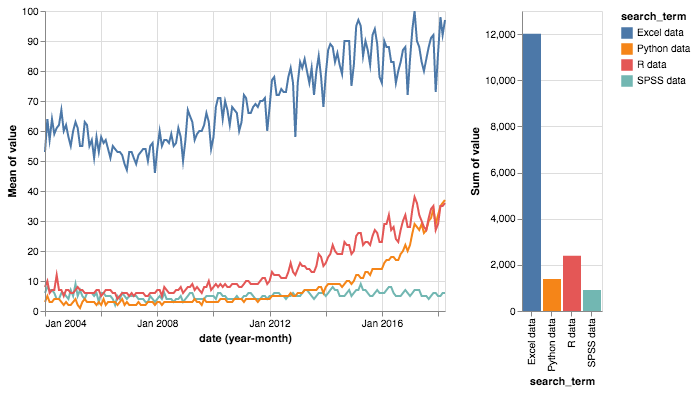

In [65]:
combina

### Story Telling

In [67]:
# queremos ver que a partir del 2017 todo empieza a subir

yearline = alt.Chart(searches).mark_line().encode(
    x="year(date):T", #añadimos el yearmonth
    y="mean(value)",
    color="search_term"
)
yearline.save("yearline.html")